In [1]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import random

# Importing sklearn libraries
from sklearn import neural_network, linear_model, preprocessing, svm, tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB

# Importing keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

# Suppressing the warnings on the usage of linear regression model
#Warning.filterwarnings(action = 'ignore', module = 'scipy', message = '^internal gelsd')

In [3]:
# Tensorflow backend
import tensorflow as tf

In [2]:
# Loading the dataset

data = pd.read_csv("C:/Bansal Data/Drishti Data/VS code/Python/ForestFire.py/forestfires.csv")
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


The attributes in the dataset are provided in the https://www.kaggle.com/elikplim/forest-fires-data-set

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


We can see that we have two objects and we need to convert them into integer for the analysis purpose.

In [8]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [3]:
data.month.replace(('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'), (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), inplace = True)
data.day.replace(('mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'), (1, 2, 3, 4, 5, 6, 7), inplace= True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


In [9]:
#correlation analysis for the dataset
data.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


In [4]:
#Extracting features from the dataset
#List is a collection which is ordered and changeable. Allows duplicate members.

x_values = list(data["X"])
y_values = list(data["Y"])

loc_values = []

for index in range(0, len(x_values)):
    tempValue = []
    tempValue.append(x_values[index])
    tempValue.append(y_values[index])
    loc_values.append(tempValue)

In [5]:
monthValues = list(data['month'])
dayValues = list(data['day'])
ffmcValues = list(data['FFMC'])
dmcValues = list(data['DMC'])
dcValues = list(data['DC'])
isiValues = list(data['ISI'])

tempValues = list(data['temp'])
rhValues = list(data['RH'])
windValues = list(data['wind'])
rainValues = list(data['rain'])
areaValues = list(data['area'])

In [6]:
attribute_list = []

for index in range(0, len(x_values)):
    temp_list = []
    temp_list.append(x_values[index])
    temp_list.append(y_values[index])
    temp_list.append(monthValues[index])
    temp_list.append(dayValues[index])
    temp_list.append(ffmcValues[index])
    temp_list.append(dcValues[index])
    temp_list.append(dmcValues[index])
    temp_list.append(isiValues[index])
    temp_list.append(tempValues[index])
    temp_list.append(rhValues[index])
    temp_list.append(windValues[index])
    temp_list.append(rainValues[index])
    temp_list.append(areaValues[index])

    attribute_list.append(temp_list)

In [7]:
# Counting the instances of location points in dataset
def count_points(x_points, y_points, scaling_factor):
    count_array = []

    for index in range(0, len(x_points)):
        tempValue = [x_points[index], y_points[index]]
        count = 0

        for value in loc_values:
            if(tempValue == value):
                count = count + 1
        count_array.append(count * scaling_factor)
    return

In [8]:
def histo_plot(dataset, title):
    plt.figure(figsize= (8, 6))

    ax = plt.subplot()
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    plt.title(title, fontsize = 22)
    plt.hist(dataset, edgecolor = 'black', linewidth = 1.2)



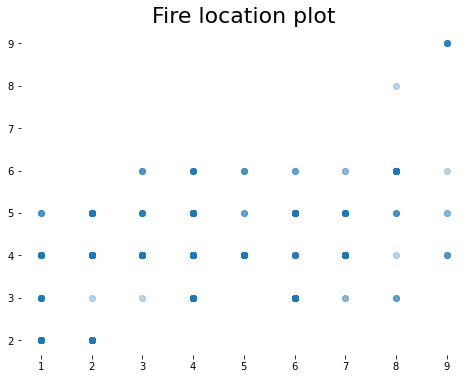

In [24]:
plt.figure(figsize= (8, 6))

ax = plt.subplot()
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.title("Fire location plot", fontsize = 22)
plt.scatter(x_values, y_values, s = count_points(x_values, y_values, 25), alpha= 0.3)
plt.show()

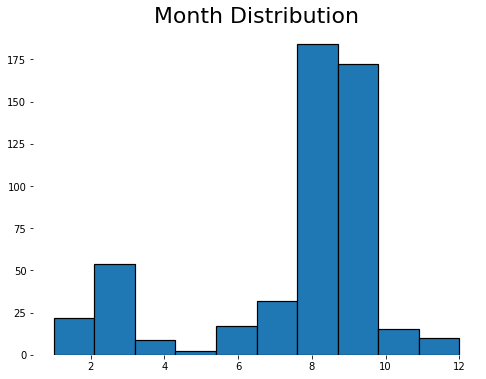

In [25]:
histo_plot(monthValues, title = "Month Distribution")
plt.show()

In [ ]:
histo_plot(dayValues, title= "Day Distribution")
plt.show()

In [9]:
total_count = 0
positive_dataCount = 0
for value in areaValues:
    if (value > 0):
        positive_dataCount = positive_dataCount + 1
    total_count = total_count + 1

print("The number of data records with 'burned area' > 0 are " + str(positive_dataCount)
+ " and the total number of records are " + str(total_count))
print("The percentage value is " + str(positive_dataCount/total_count * 100) + ".")

The number of data records with 'burned area' > 0 are 270 and the total number of records are 517
The percentage value is 52.22437137330754.


In [10]:
# Spliting the available data/Setting the initial parameters

train_x, test_x, train_y, test_y = train_test_split(attribute_list, areaValues, test_size= 0.3, random_state= 9)
MSE = []
VarianceScore = []

In [11]:
# Printing the actual versus predicted values

def printValues(test, predicted):
    print("The actual output and the predicted output are: ")

    for value in range(0, len(predicted_y)):
        print('%.4f' % test_y[value], " ", '%.4f' % predicted_y[value])

In [12]:
LR = linear_model.LinearRegression()

LR.fit(train_x, train_y)
predicted_y = LR.predict(test_x)

print('Coefficients: \n', LR.coef_)
print("\nMean Squared Error: ", mean_squared_error(test_y, predicted_y))
print("Variance score: %.2f" % r2_score(test_y, predicted_y))

MSE.append(mean_squared_error(test_y, predicted_y))
VarianceScore.append(r2_score(test_y, predicted_y))

Coefficients: 
 [-1.12066714e-15 -7.77156117e-16  3.29229246e-15 -6.74576310e-16
  3.41618378e-16  7.68046604e-15  1.35427430e-15  1.22557568e-16
  1.22038675e-17 -2.88979383e-16 -1.60068841e-16  1.36531346e-15
  1.00000000e+00]

Mean Squared Error:  3.657191883005896e-24
Variance score: 1.00


In [13]:
DecisionTree = tree.DecisionTreeRegressor()
DecisionTree.fit(train_x, train_y)
predicted_y = DecisionTree.predict(test_x)

print("Mean Squared Error: ", mean_squared_error(test_y, predicted_y))
print("Variance score: %.2f" % r2_score(test_y, predicted_y))

MSE.append(mean_squared_error(test_y, predicted_y))
VarianceScore.append(r2_score(test_y, predicted_y))

Mean Squared Error:  475.52010192307677
Variance score: 0.74


In [14]:
MLP = neural_network.MLPRegressor(hidden_layer_sizes= (150, 50, 50), activation= "tanh", solver = "sgd",
learning_rate= "adaptive")

MLP.fit(train_x, train_y)
predicted_y = MLP.predict(test_x)

print("Mean Squared Error: ", mean_squared_error(test_y, predicted_y))
print("Variance score: %.2f" % r2_score(test_y, predicted_y))

MSE.append(mean_squared_error(test_y, predicted_y))
VarianceScore.append(r2_score(test_y, predicted_y))

Mean Squared Error:  1865.7679340327054
Variance score: -0.02


In [15]:
svm_model = svm.SVR()

svm_model.fit(train_x, train_y)
predicted_y = svm_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

MSE.append(mean_squared_error(test_y, predicted_y))
VarianceScore.append(r2_score(test_y, predicted_y))

Mean squared error:  1999.635771825441
Variance score: -0.09


In [16]:
random_forest = RandomForestRegressor()
random_forest.fit(train_x, train_y)
predicted_y = random_forest.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

MSE.append(mean_squared_error(test_y, predicted_y))
VarianceScore.append(r2_score(test_y, predicted_y))

Mean squared error:  372.35438899634664
Variance score: 0.80


In [17]:
bayesian_ridge = linear_model.BayesianRidge()
bayesian_ridge.fit(train_x, train_y)
predicted_y = bayesian_ridge.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

MSE.append(mean_squared_error(test_y, predicted_y))
VarianceScore.append(r2_score(test_y, predicted_y))

Mean squared error:  7.16080259232995e-24
Variance score: 1.00


In [18]:
lasso_model = linear_model.Lasso()
lasso_model.fit(train_x, train_y)
predicted_y = lasso_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

MSE.append(mean_squared_error(test_y, predicted_y))
VarianceScore.append(r2_score(test_y, predicted_y))

Mean squared error:  7.387638302532171e-05
Variance score: 1.00


In [19]:
def generate_plt(title, ticks, dataset, color_number):
    colors = ["slateblue", "mediumseagreen", "tomato"]
    plt.figure(figsize= (8, 6))

    ax = plt.subplot()
    ax.spines["top"].set_visible(False) 
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.xticks(np.arange(len(ticks)), ticks, fontsize=10, rotation=30)
    plt.title(title, fontsize = 22)
    plt.bar(ticks, dataset, linewidth=1.2, color=colors[color_number])

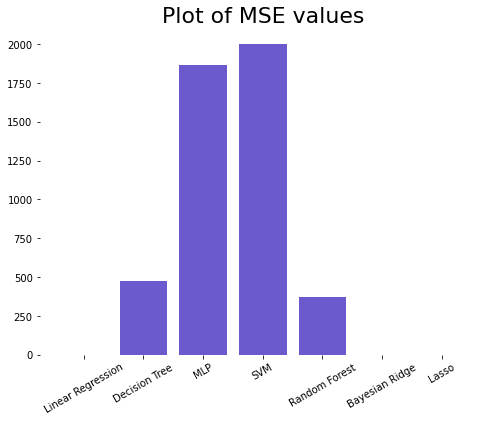

In [20]:
ticks = ["Linear Regression", "Decision Tree", "MLP", "SVM", "Random Forest", "Bayesian Ridge", "Lasso"]
generate_plt("Plot of MSE values", ticks, MSE, 0)

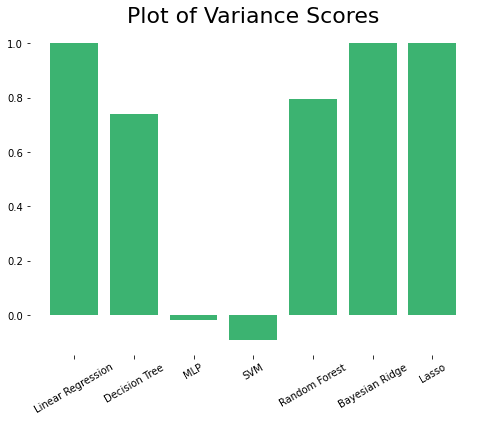

In [21]:
generate_plt("Plot of Variance Scores", ticks, VarianceScore, 1)